# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import os
import openpyxl
import xlrd
from functools import reduce
import datetime

# Import Data Files

In [2]:
file = (r'c:/Users/pjant/Drew/DATA 601/datasets/final project/Dataset For Final Project.xlsm')
sheet_name = ('Data Table Training')

In [3]:
df_swapIV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','IV'), usecols=(1,2))
df_swapRates = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Rates'), usecols=(4,5) )
df_swapHV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date', 'HV'), usecols=(4,6))
df_VIX = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date', 'VIX'), usecols=(8,9))
df_curve = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Curve'), usecols=(11,12))
df_SPX = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','SPX'), usecols=(14,15))
df_SPXHV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','SPXHV'), usecols=(14,16))
df_CDXHY = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','CDXHY'),usecols=(18,19))
df_Spreads = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Spreads'),usecols=(21,22))
df_HYG = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','HYG'),usecols=(25,26))

# Create Data Frame

In [4]:
data_frames = [df_swapIV, df_swapRates, df_swapHV, df_VIX, df_curve, df_SPX, df_SPXHV, df_Spreads, df_HYG]

In [5]:
for i in data_frames:
    i = i.set_index('Date', inplace=True)

In [6]:
df = reduce(lambda  left,right:pd.merge(left,right,left_index=True,right_index=True),data_frames)

In [7]:
df = df.fillna(method='ffill')

In [8]:
df.tail()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2020-05-04,60.0715,0.6306,0.299237,35.97,0.3149,2842.74,37.108482,-0.50,78.57
2020-05-05,60.5100,0.6569,0.353016,33.61,0.3443,2868.44,27.059637,-0.63,79.25
2020-05-06,63.1043,0.6667,0.355211,34.12,0.3705,2848.42,26.893851,-3.70,78.80
2020-05-07,64.3500,0.6080,0.612135,31.44,0.3655,2881.19,13.191213,-3.45,79.00
2020-05-08,67.0854,0.6439,0.689029,27.98,0.3877,2929.80,16.478790,-4.13,79.75


In [9]:
#df_w = df.groupby(pd.Grouper(freq='W')).nth(0)
df_w = df[df.index.dayofweek==4]

In [10]:
df_w

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2007-09-21,96.2500,5.2655,2.160149,19.00,0.5990,1438.87,6.817902,64.30,103.75
2007-09-28,97.9500,5.2110,0.680752,18.00,0.5540,1472.50,7.473062,62.50,104.00
2007-10-05,89.9500,5.2590,1.220172,16.91,0.4670,1495.42,8.230265,63.00,103.90
2007-10-12,80.9500,5.3005,0.635791,17.73,0.4380,1495.92,9.388424,61.70,104.50
2007-10-19,86.1500,5.0390,0.524584,22.96,0.5545,1512.58,6.634837,64.50,102.80
...,...,...,...,...,...,...,...,...,...
2020-04-10,81.0000,0.8080,0.596000,41.67,0.3426,2789.82,48.267454,7.75,82.36
2020-04-17,78.5064,0.7128,1.001000,38.15,0.2967,2874.56,38.769620,7.00,81.09
2020-04-24,72.8300,0.6323,0.329383,35.93,0.2483,2836.74,18.199047,3.00,78.32


# Examine Data

In [11]:
df_w.tail()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2020-04-10,81.0000,0.8080,0.596000,41.67,0.3426,2789.82,48.267454,7.75,82.36
2020-04-17,78.5064,0.7128,1.001000,38.15,0.2967,2874.56,38.769620,7.00,81.09
2020-04-24,72.8300,0.6323,0.329383,35.93,0.2483,2836.74,18.199047,3.00,78.32
2020-05-01,60.1500,0.6195,0.517108,37.19,0.2955,2830.71,36.552269,0.50,78.68
2020-05-08,67.0854,0.6439,0.689029,27.98,0.3877,2929.80,16.478790,-4.13,79.75


In [12]:
df_w.corr()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
IV,1.000000,0.535327,0.652048,0.701683,0.468755,-0.677775,0.450784,0.554795,-0.319010
Rates,0.535327,1.000000,0.343193,0.225462,0.363197,-0.445887,0.096597,0.774326,0.225237
HV,0.652048,0.343193,1.000000,0.541053,0.234185,-0.362192,0.303886,0.387721,-0.220908
VIX,0.701683,0.225462,0.541053,1.000000,0.121492,-0.354941,0.501834,0.349914,-0.587685
Curve,0.468755,0.363197,0.234185,0.121492,1.000000,-0.814294,0.078331,0.244443,0.206416
SPX,-0.677775,-0.445887,-0.362192,-0.354941,-0.814294,1.000000,-0.280611,-0.456262,-0.086465
SPXHV,0.450784,0.096597,0.303886,0.501834,0.078331,-0.280611,1.000000,0.161450,-0.411617
Spreads,0.554795,0.774326,0.387721,0.349914,0.244443,-0.456262,0.161450,1.000000,0.344764
HYG,-0.319010,0.225237,-0.220908,-0.587685,0.206416,-0.086465,-0.411617,0.344764,1.000000


In [13]:
df_w.describe()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,90.639513,2.670718,0.860984,19.717425,1.288609,1837.666888,15.782177,11.147504,88.063295
std,31.426028,0.892958,0.550488,10.075625,0.816397,645.721991,14.328106,20.268299,6.092354
min,49.015000,0.619500,0.067614,9.140000,-0.132500,683.380000,1.006518,-17.250000,62.000000
25%,68.200000,2.065000,0.510864,13.340000,0.568600,1315.380000,7.178325,-1.380000,85.730000
50%,81.000000,2.512200,0.729109,16.830000,1.315000,1762.110000,11.393876,8.250000,87.980000
75%,107.065000,3.112500,1.068748,22.510000,1.975000,2304.920000,19.374563,15.000000,91.870000
max,212.650000,5.300500,4.911519,79.130000,2.782800,3373.940000,140.164278,86.000000,104.500000


C:\Users\pjant\Miniconda3\envs\data601\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


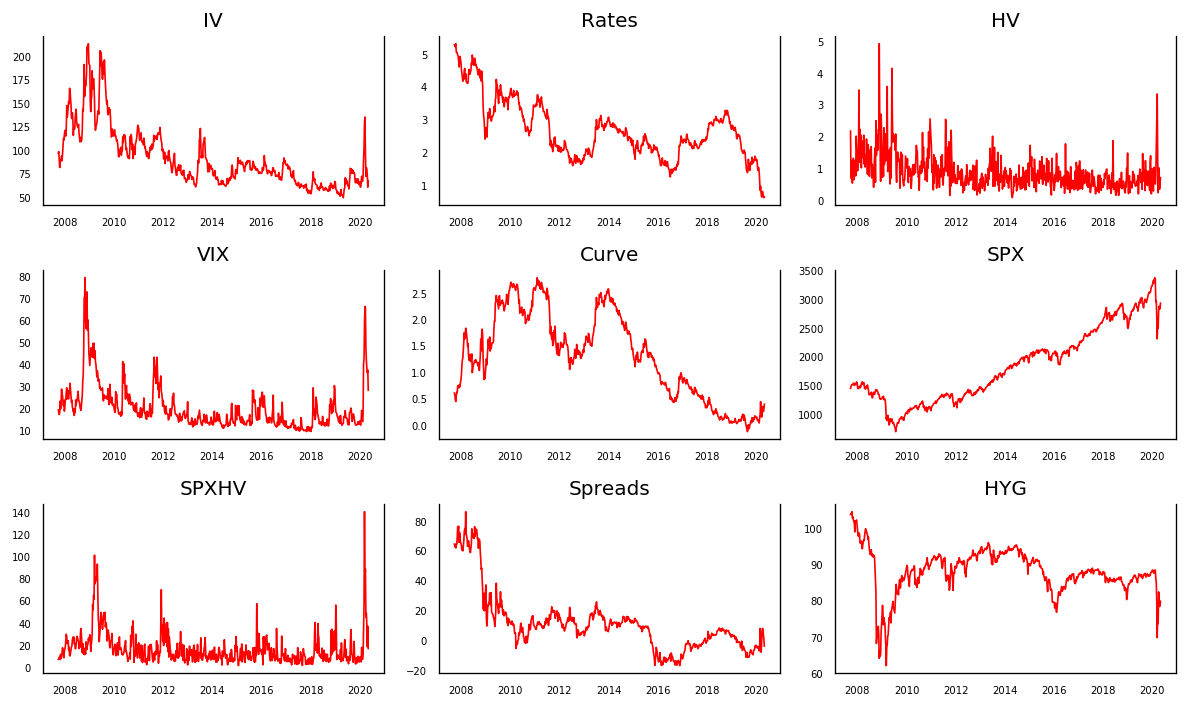

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_w[df_w.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df_w.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

In [15]:
df_w.isna().sum()

IV         0
Rates      0
HV         0
VIX        0
Curve      0
SPX        0
SPXHV      0
Spreads    0
HYG        0
dtype: int64

# Run a Lag Plot on the Raw Data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_w), columns = df_w.columns)

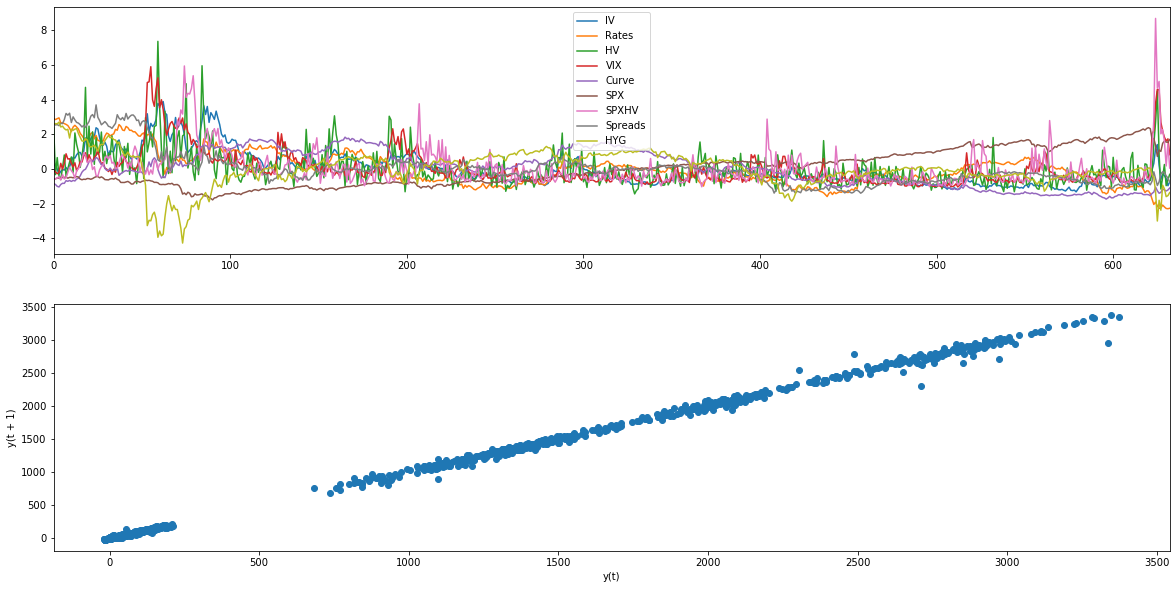

In [17]:
# Is the data Random.  Random data will not exhibit a structure in the lag plot

fig,(ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(20,10))
df_scaled.plot(ax=ax1) # series plot
pd.plotting.lag_plot(df_w) #lag plot

# Run Autocorrelation Plots on each of the Raw Variables for All Days in the Time Series

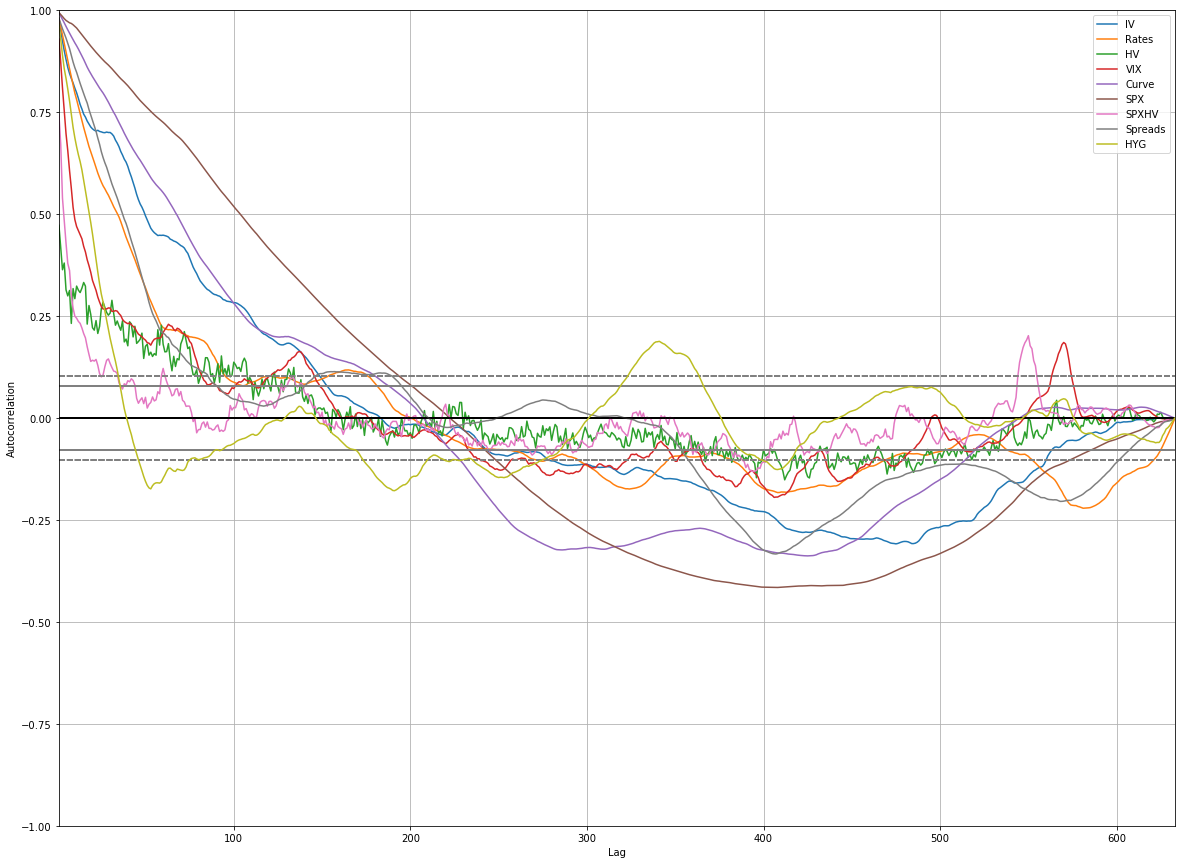

In [18]:
plt.rcParams["figure.figsize"] = (20,15)
pd.plotting.autocorrelation_plot(df_w.IV, label = 'IV')
pd.plotting.autocorrelation_plot(df_w.Rates, label = 'Rates')
pd.plotting.autocorrelation_plot(df_w.HV, label = 'HV')
pd.plotting.autocorrelation_plot(df_w.VIX, label = 'VIX')
pd.plotting.autocorrelation_plot(df_w.Curve, label = 'Curve')
pd.plotting.autocorrelation_plot(df_w.SPX, label = 'SPX')
pd.plotting.autocorrelation_plot(df_w.SPXHV, label = 'SPXHV')
pd.plotting.autocorrelation_plot(df_w.Spreads, label = 'Spreads')
pd.plotting.autocorrelation_plot(df_w.HYG, label = 'HYG')

# Run Autocorrelation and PACF plots for each raw variable for 75 days

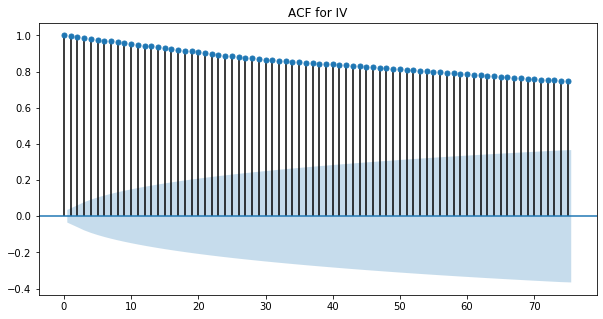

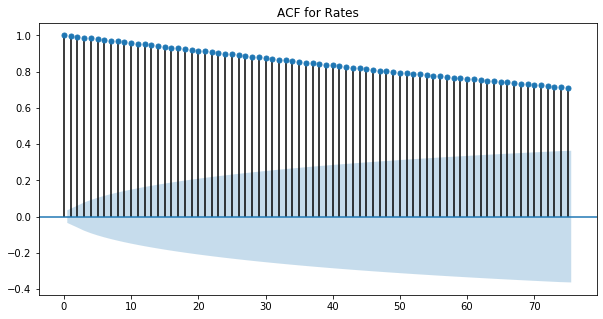

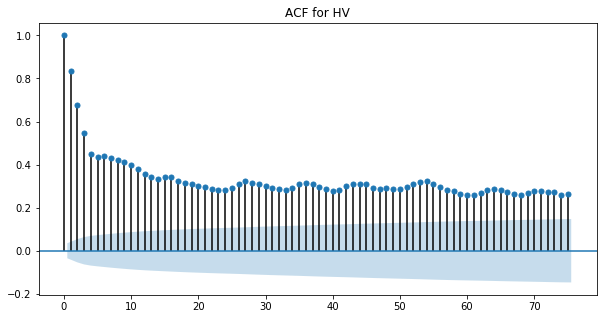

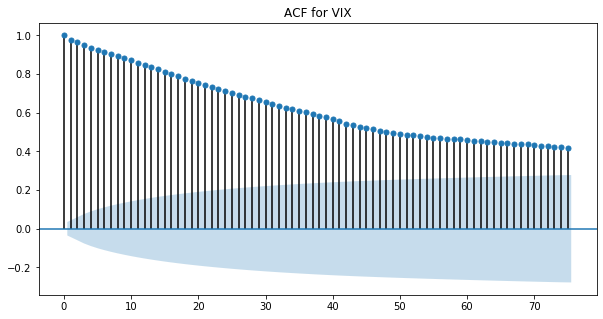

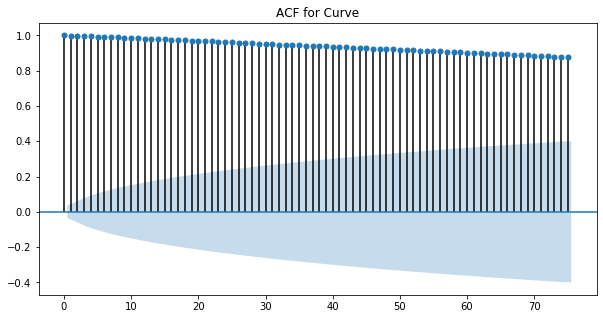

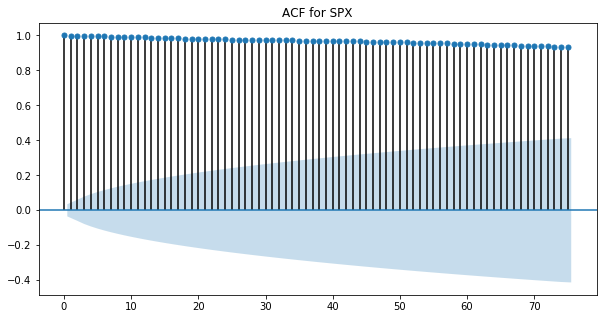

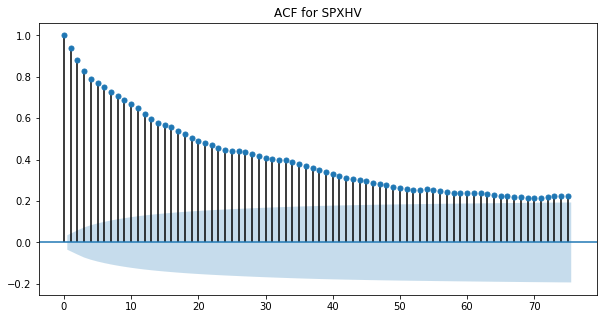

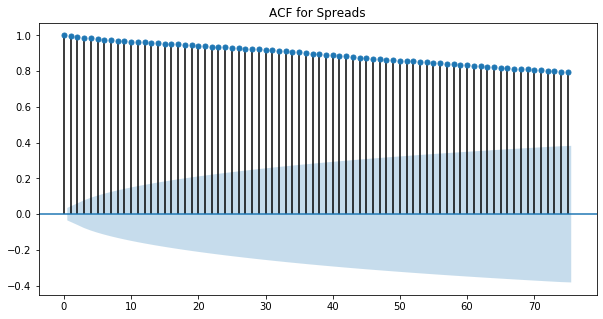

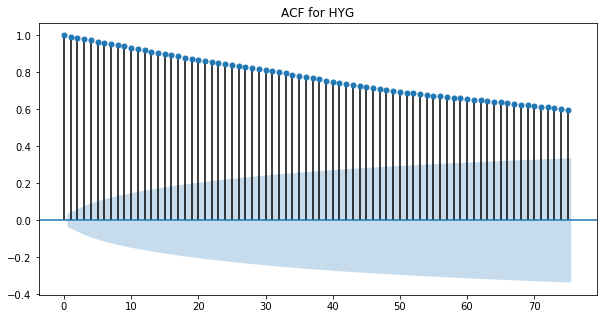

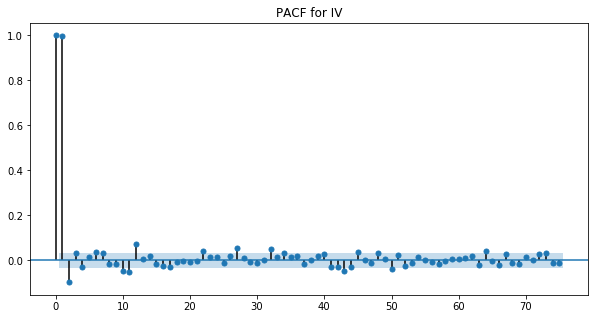

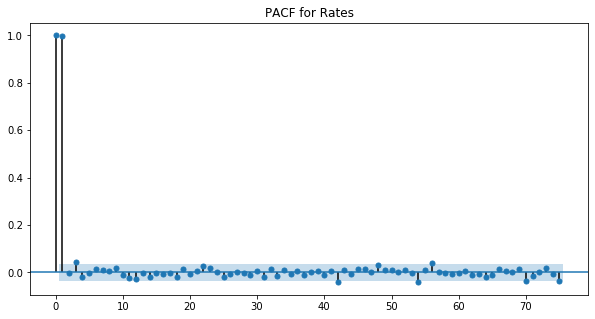

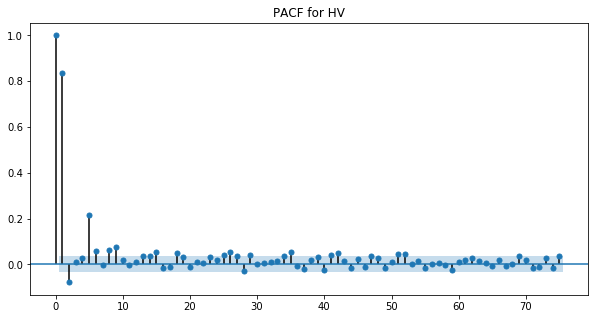

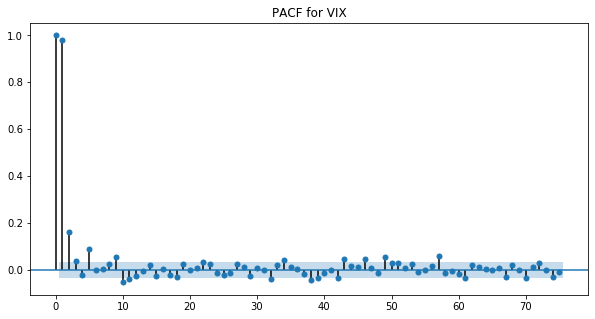

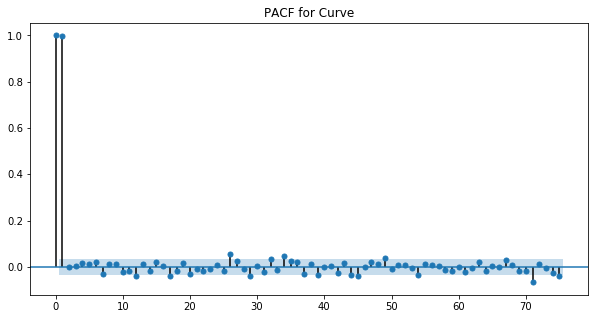

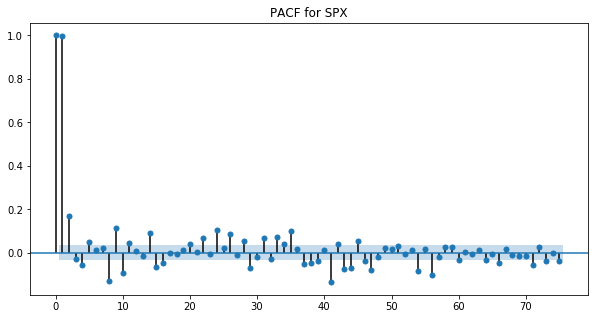

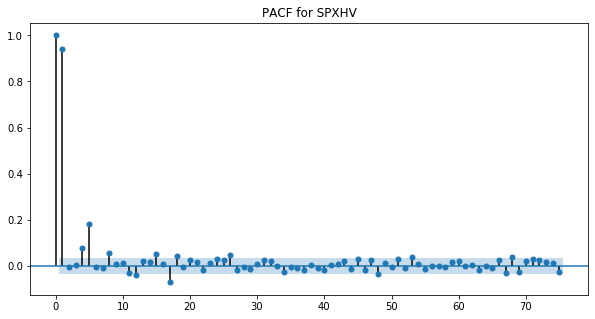

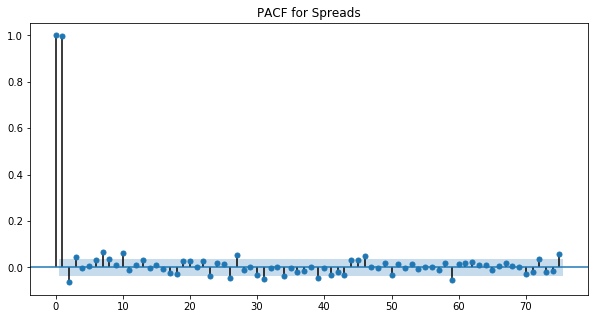

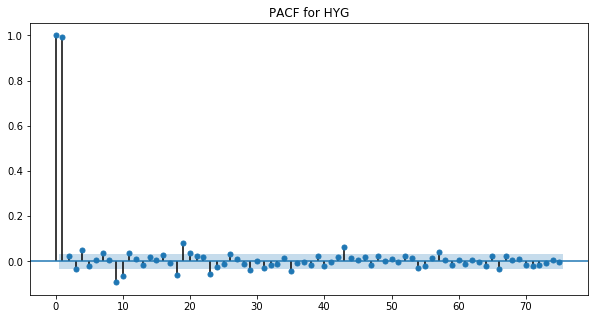

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams["figure.figsize"] = (10,5)
for i in df_w:
    plot_acf(df[i],lags=75)
    plt.title('ACF for %s'%i)
    
for j in df_w:
    plot_pacf(df[j], lags=75)
    plt.title('PACF for %s'%j)

# Run Granger Causality Tests on Every Raw Variable

The below block of code creates a function called 'grangers_causation_matrix', which runs each pair of columns against each other, n=maxlag times, and stores the minimum p-value for the given 'test' in a new 'column-by-column' dimension matrix

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df_granger = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_granger.columns:
        for r in df_granger.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_granger.loc[r, c] = min_p_value
    df_granger.columns = [var + '_x' for var in variables]
    df_granger.index = [var + '_y' for var in variables]
    return df_granger

grangers_causation_matrix(df_w, variables = df.columns)

# ran the block of code in detail - the below warning shows up (after making both of the above "verbose=True") at
# maxlag=10 for r='Spreads' and c='Spreads'

,IV_x,Rates_x,HV_x,VIX_x,Curve_x,SPX_x,SPXHV_x,Spreads_x,HYG_x
IV_y,1.0000,0.0000,0.0157,0.0697,0.0113,0.0121,0.0001,0.0000,0.2425
Rates_y,0.0008,1.0000,0.0051,0.0001,0.2948,0.0666,0.3007,0.0018,0.0000
HV_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
VIX_y,0.0005,0.0034,0.0855,1.0000,0.0025,0.0954,0.0250,0.0020,0.0154
Curve_y,0.0004,0.1020,0.0005,0.0000,1.0000,0.0003,0.0122,0.0078,0.0000
SPX_y,0.0000,0.2650,0.0035,0.0000,0.3498,1.0000,0.0000,0.1963,0.0133
SPXHV_y,0.0000,0.2633,0.0000,0.0000,0.6365,0.0000,1.0000,0.0029,0.0000
Spreads_y,0.0022,0.0016,0.0015,0.0011,0.0465,0.3774,0.0525,1.0000,0.0000
HYG_y,0.0006,0.0015,0.0014,0.0000,0.0009,0.0353,0.0000,0.0021,1.0000


Below code block is simply a copy and detailed explanation of each line of code for the 'grangers_causation_matrix' function created above

In [21]:
maxlag=12
test = 'ssr_chi2test'
variables = df_w.columns
verbose=False

#first, create a 'variable'-by-'variable' size dataframe filled with 0 values, with column names 'variables', 
# and indexes 'variables'
df_granger = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

#run a granger causality test on each column v. each column in the original dataframe, and fill the above dataframe
#with the results
for c in df_granger.columns:  # for each column
    for r in df_granger.index: # begin with, and continue through, each row
        test_result = grangercausalitytests(df_w[[r, c]], maxlag=maxlag, verbose=False) #calculating the GCT - r is a column, and c is a different column
        p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)] #see note below for output of grangercausalitytests (here, 'test_result')
        if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
        min_p_value = np.min(p_values) #see note below
        df_granger.loc[r, c] = min_p_value #store the minimum p-value in the current r,c location of the new dataframe 
df_granger.columns = [var + '_x' for var in variables] #rename the column_heads as the x variables
df_granger.index = [var + '_y' for var in variables] #rename the row.indexes as the y variables
df_granger

#the output of the granger causality test is:
# 1) a dictionary of
# 2) n = maxlag results
# 3) each 2) above, or n, contains
# 4) 2 items
# 5) First, a dictionary of:
#   a) ssr_ftest: (1,2,3,4)
#   b) ssr_chi2test: (1,2,3)
#   c) lrtest: (1,2,3)
#   d) params_ftest
# 6) Second, 3 'results'
#   a) <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x18ea25b0198>
#   b) <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x18ea25b0668>
#   c) array([[0.,1.,0.]])
#As a result the code line above 'p_values = ...' pulls the 2nd number of the ssr_chi2test above for each of the maxlags,
#and then the 'min_p_value = ...' stores the minimum of these values for all of the maxlag runs

,IV_x,Rates_x,HV_x,VIX_x,Curve_x,SPX_x,SPXHV_x,Spreads_x,HYG_x
IV_y,1.0000,0.0000,0.0157,0.0697,0.0113,0.0121,0.0001,0.0000,0.2425
Rates_y,0.0008,1.0000,0.0051,0.0001,0.2948,0.0666,0.3007,0.0018,0.0000
HV_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
VIX_y,0.0005,0.0034,0.0855,1.0000,0.0025,0.0954,0.0250,0.0020,0.0154
Curve_y,0.0004,0.1020,0.0005,0.0000,1.0000,0.0003,0.0122,0.0078,0.0000
SPX_y,0.0000,0.2650,0.0035,0.0000,0.3498,1.0000,0.0000,0.1963,0.0133
SPXHV_y,0.0000,0.2633,0.0000,0.0000,0.6365,0.0000,1.0000,0.0029,0.0000
Spreads_y,0.0022,0.0016,0.0015,0.0011,0.0465,0.3774,0.0525,1.0000,0.0000
HYG_y,0.0006,0.0015,0.0014,0.0000,0.0009,0.0353,0.0000,0.0021,1.0000


The 2 code blocks below are simply a way to test each of the individual results in the above matrix for correctness.  Not necessary to run, just here in case of 'suspicious' values that need to be checked.

In [22]:
granger = grangercausalitytests(df_w[['HYG','IV']], maxlag=12, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9361  , p=0.3337  , df_denom=629, df_num=1
ssr based chi2 test:   chi2=0.9406  , p=0.3321  , df=1
likelihood ratio test: chi2=0.9399  , p=0.3323  , df=1
parameter F test:         F=0.9361  , p=0.3337  , df_denom=629, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2919  , p=0.2755  , df_denom=626, df_num=2
ssr based chi2 test:   chi2=2.6045  , p=0.2719  , df=2
likelihood ratio test: chi2=2.5991  , p=0.2727  , df=2
parameter F test:         F=1.2919  , p=0.2755  , df_denom=626, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9499  , p=0.0322  , df_denom=623, df_num=3
ssr based chi2 test:   chi2=8.9491  , p=0.0300  , df=3
likelihood ratio test: chi2=8.8861  , p=0.0308  , df=3
parameter F test:         F=2.9499  , p=0.0322  , df_denom=623, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.5684  , p=0.0012  

In [23]:
a = 0
b = 1

print(granger[1][a]['ssr_chi2test'][b])
print(granger[2][a]['ssr_chi2test'][b])
print(granger[3][a]['ssr_chi2test'][b])
print(granger[4][a]['ssr_chi2test'][b])
print(granger[5][a]['ssr_chi2test'][b])
print(granger[6][a]['ssr_chi2test'][b])
print(granger[7][a]['ssr_chi2test'][b])
print(granger[8][a]['ssr_chi2test'][b])
print(granger[9][a]['ssr_chi2test'][b])
print(granger[10][a]['ssr_chi2test'][b])
print(granger[11][a]['ssr_chi2test'][b])
print(granger[12][a]['ssr_chi2test'][b])

0.33212949879969556
0.27192457456861685
0.02997585120808037
0.0009680903049304928
0.0006000556659034521
0.0006519533867427134
0.000956268223795932
0.0011610145468344969
0.001645689057123977
0.003681967857149505
0.005120026456147323
0.004485349284588175


# Run Cointegration Tests for Each of the Raw Variables

In [24]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_w)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
IV     ::  396.96    > 179.5199  =>   True
Rates  ::  281.12    > 143.6691  =>   True
HV     ::  179.13    > 111.7797  =>   True
VIX    ::  88.8      > 83.9383   =>   True
Curve  ::  47.91     > 60.0627   =>   False
SPX    ::  27.2      > 40.1749   =>   False
SPXHV  ::  11.1      > 24.2761   =>   False
Spreads ::  3.24      > 12.3212   =>   False
HYG    ::  0.01      > 4.1296    =>   False


# Run Dickey-Fuller Tests on the Raw Data to Check for Stationarity

In [25]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [26]:
# ADF Test on each column
for name, column in df_w.iteritems():      # changed this row of code - df_train to df
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7492
 No. Lags Chosen       = 0
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0659. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Rates" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2739
 No. Lags Chosen       = 2
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.1805. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

# Create Training and Testing Set on the Raw Data

In [27]:
nobs = 5
df_train, df_test = df_w[0:-nobs], df_w[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(628, 9)
(5, 9)


# Difference the Training Data (ADF Tests Did Not Look Good; also too much AC)

In [28]:
t = df_train.diff().dropna()
df_train.diff()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2007-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-28,1.7000,-0.0545,-1.479397,-1.00,-0.0450,33.63,0.655161,-1.80,0.25
2007-10-05,-8.0000,0.0480,0.539420,-1.09,-0.0870,22.92,0.757203,0.50,-0.10
2007-10-12,-9.0000,0.0415,-0.584381,0.82,-0.0290,0.50,1.158159,-1.30,0.60
2007-10-19,5.2000,-0.2615,-0.111207,5.23,0.1165,16.66,-2.753587,2.80,-1.70
...,...,...,...,...,...,...,...,...,...
2020-03-06,11.2300,-0.2767,0.908003,1.83,0.0641,18.15,24.749509,11.00,-0.99
2020-03-13,26.9825,0.1225,0.710851,15.89,0.2377,-261.35,84.072123,-7.75,-5.00
2020-03-20,7.2375,-0.1972,0.983247,8.21,-0.1737,-406.10,-57.366516,-8.25,-10.30


# Analyze the Differenced Data

In [29]:
t.tail()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2020-03-06,11.2300,-0.2767,0.908003,1.83,0.0641,18.15,24.749509,11.00,-0.99
2020-03-13,26.9825,0.1225,0.710851,15.89,0.2377,-261.35,84.072123,-7.75,-5.00
2020-03-20,7.2375,-0.1972,0.983247,8.21,-0.1737,-406.10,-57.366516,-8.25,-10.30
2020-03-27,-37.4700,-0.1258,-2.003346,-0.50,-0.1184,236.55,5.298650,4.25,7.28
2020-04-03,-25.6900,0.0119,-1.104277,-18.74,0.0402,-52.82,-43.325754,9.37,-3.48


In [30]:
t.corr()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
IV,1.000000,0.256321,0.225749,0.317942,0.207472,-0.121534,0.094740,0.156932,-0.367743
Rates,0.256321,1.000000,-0.027593,-0.325586,0.647434,0.054178,0.018056,0.244091,0.153939
HV,0.225749,-0.027593,1.000000,0.124948,0.004172,-0.105164,-0.080069,-0.006095,-0.097138
VIX,0.317942,-0.325586,0.124948,1.000000,-0.229053,-0.108994,0.069166,-0.024989,-0.597592
Curve,0.207472,0.647434,0.004172,-0.229053,1.000000,-0.014861,0.081085,0.071144,0.126252
SPX,-0.121534,0.054178,-0.105164,-0.108994,-0.014861,1.000000,-0.237108,0.039352,0.232551
SPXHV,0.094740,0.018056,-0.080069,0.069166,0.081085,-0.237108,1.000000,-0.023409,0.057230
Spreads,0.156932,0.244091,-0.006095,-0.024989,0.071144,0.039352,-0.023409,1.000000,0.027026
HYG,-0.367743,0.153939,-0.097138,-0.597592,0.126252,0.232551,0.057230,0.027026,1.000000


In [31]:
t.describe()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,-0.039298,-0.007358,-0.003092,0.044338,-0.000664,1.674290,0.060531,-0.093987,-0.048166
std,6.954287,0.126888,0.564412,3.752446,0.087227,45.354429,10.179823,3.215400,1.415746
min,-38.900000,-0.650000,-2.676375,-19.240000,-0.428300,-406.100000,-57.366516,-22.380000,-14.200000
25%,-2.902300,-0.080650,-0.308324,-1.600000,-0.044750,-14.995000,-4.389257,-1.375000,-0.520000
50%,-0.169800,-0.014300,-0.005900,-0.190000,-0.009500,6.130000,0.200575,-0.120000,0.050000
75%,2.991000,0.062850,0.295583,1.555000,0.044400,24.980000,4.362533,1.250000,0.495000
max,34.000000,0.564700,2.673284,24.810000,0.347300,236.550000,84.072123,18.750000,7.280000


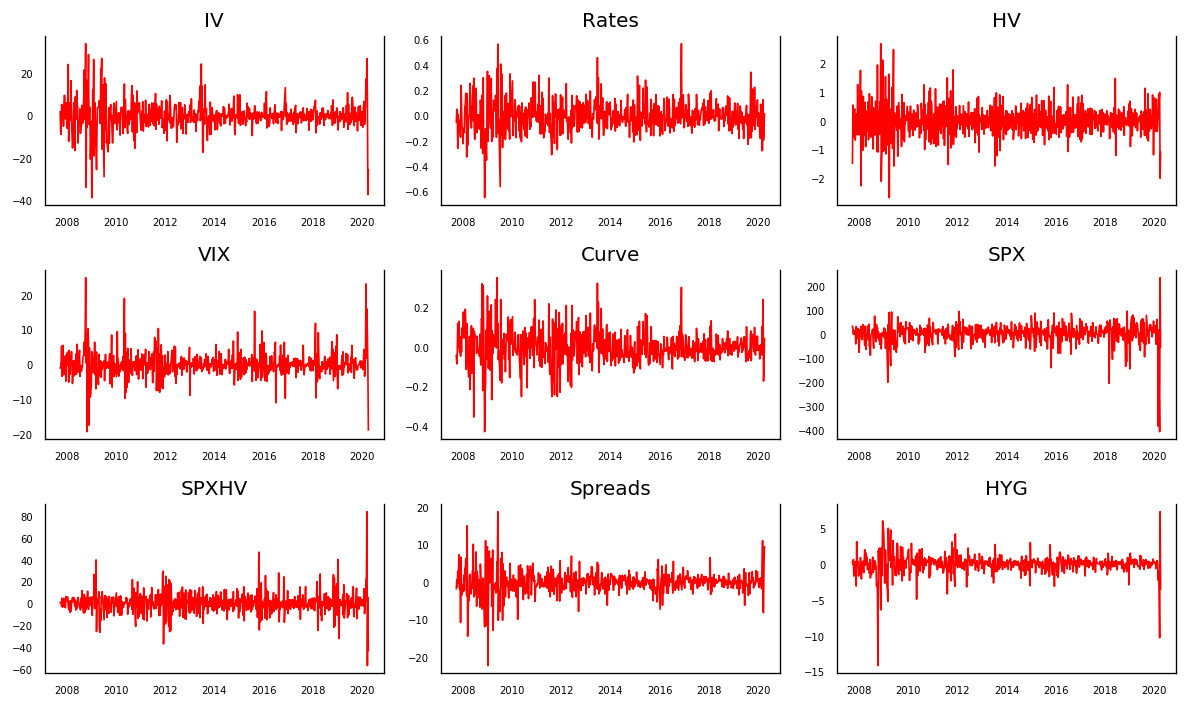

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = t[t.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(t.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

# Run a Lag Plot on the Differenced Data

In [33]:
t_scaled = pd.DataFrame(scaler.fit_transform(t), columns = t.columns)

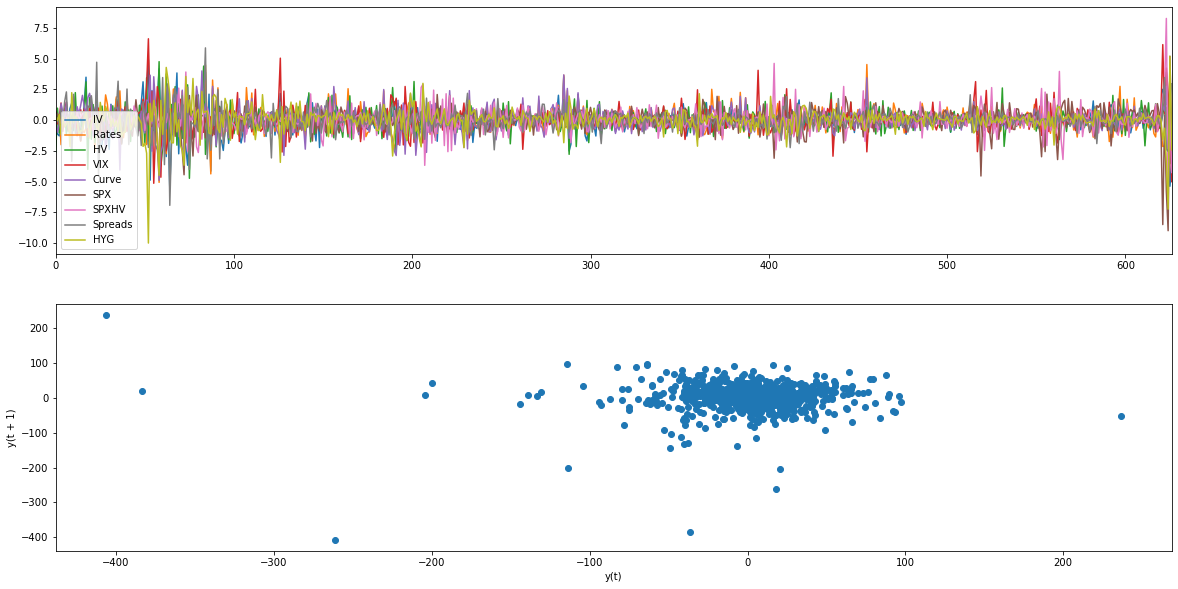

In [34]:
# Is the data Random.  Random data will not exhibit a structure in the lag plot

fig,(ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(20,10))
t_scaled.plot(ax=ax1) # series plot
pd.plotting.lag_plot(t) #lag plot

# Run Autocorrelation Plots on each of the Differenced Variables for All Days in the Time Series

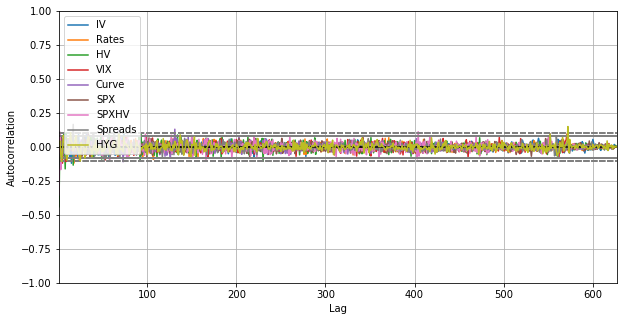

In [35]:
pd.plotting.autocorrelation_plot(t.IV, label = 'IV')
pd.plotting.autocorrelation_plot(t.Rates, label = 'Rates')
pd.plotting.autocorrelation_plot(t.HV, label = 'HV')
pd.plotting.autocorrelation_plot(t.VIX, label = 'VIX')
pd.plotting.autocorrelation_plot(t.Curve, label = 'Curve')
pd.plotting.autocorrelation_plot(t.SPX, label = 'SPX')
pd.plotting.autocorrelation_plot(t.SPXHV, label = 'SPXHV')
pd.plotting.autocorrelation_plot(t.Spreads, label = 'Spreads')
pd.plotting.autocorrelation_plot(t.HYG, label = 'HYG')
plt.rcParams["figure.figsize"] = (20,15)

# Run Autocorrelation and PACF plots for each differenced variable for 75 days

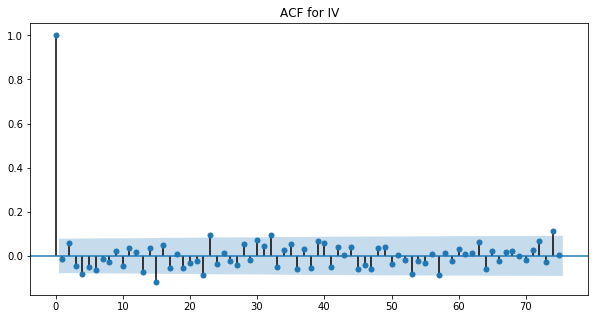

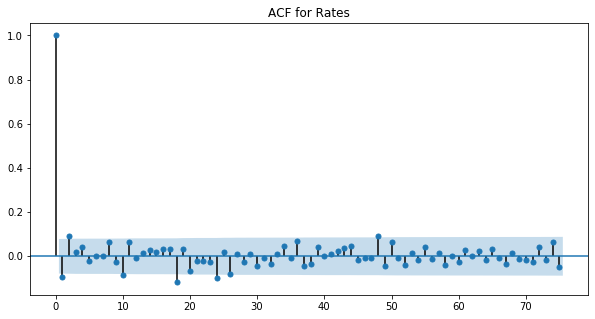

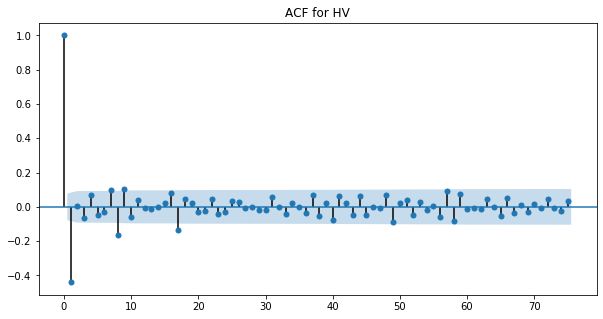

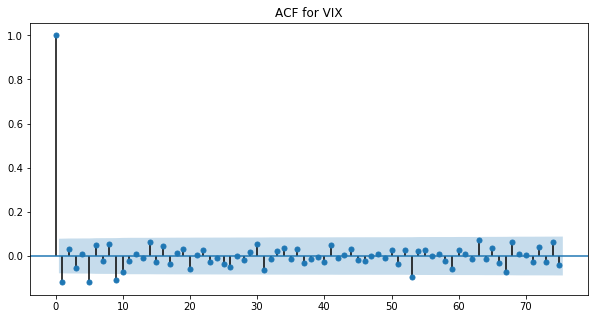

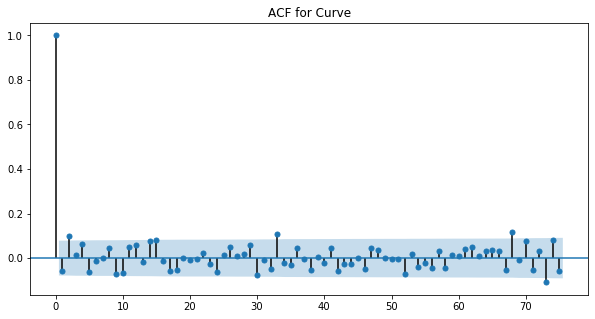

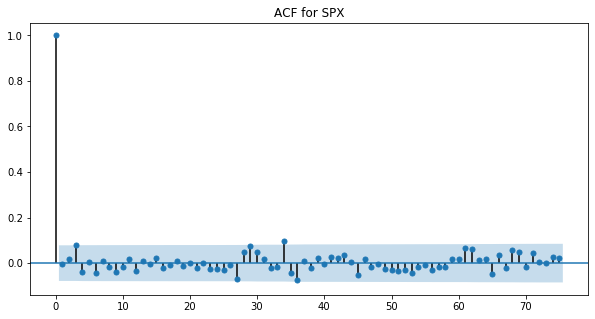

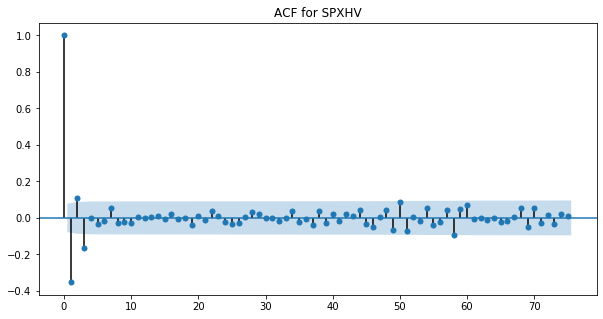

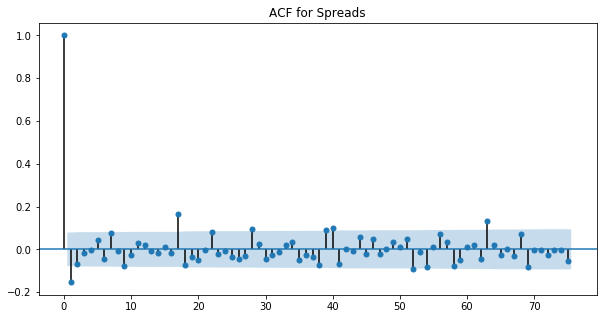

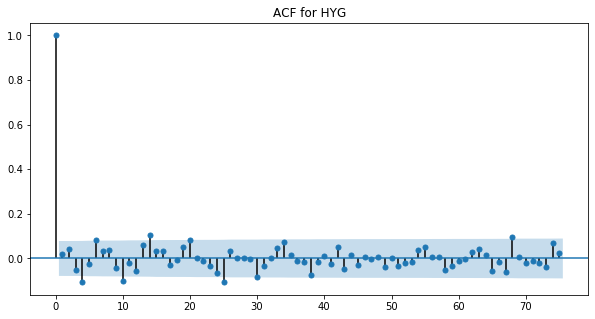

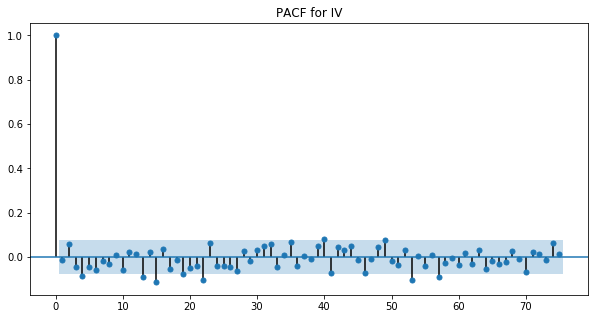

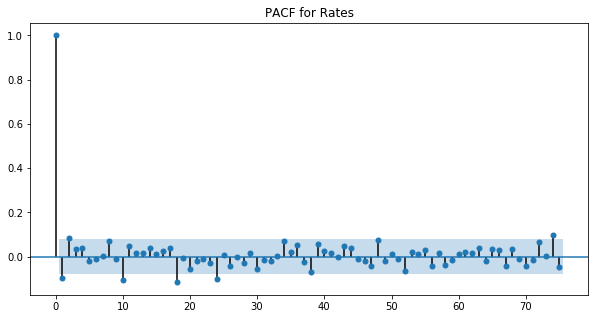

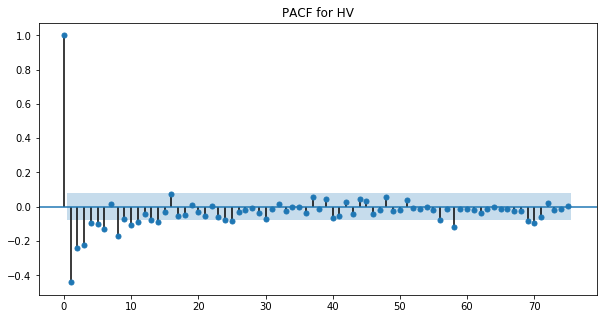

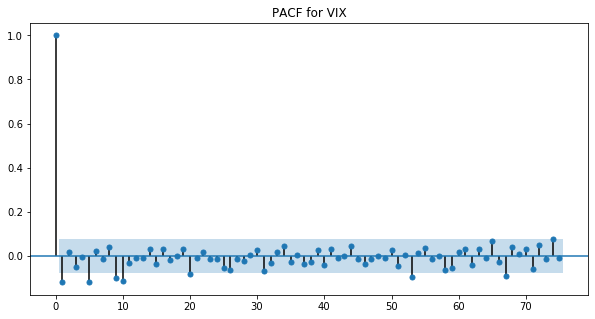

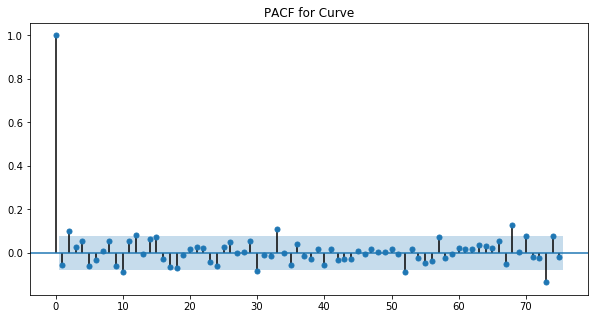

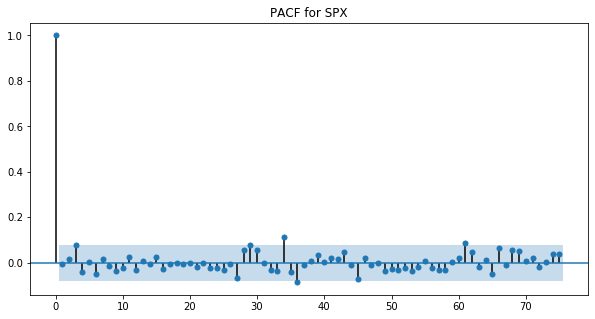

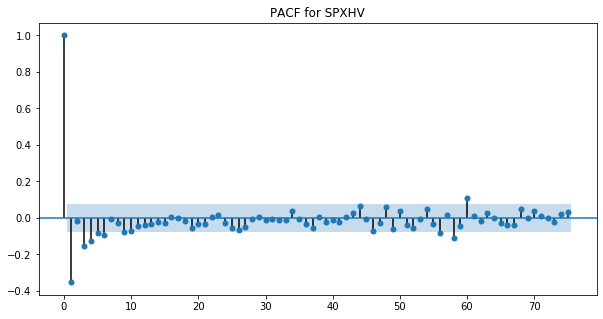

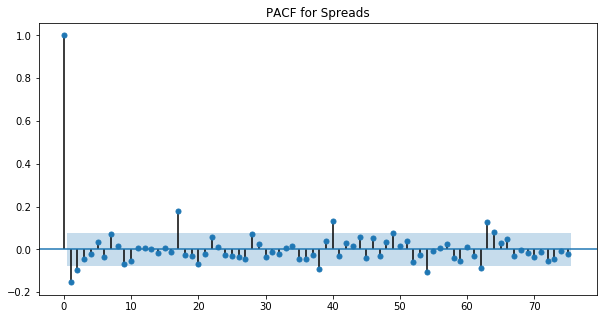

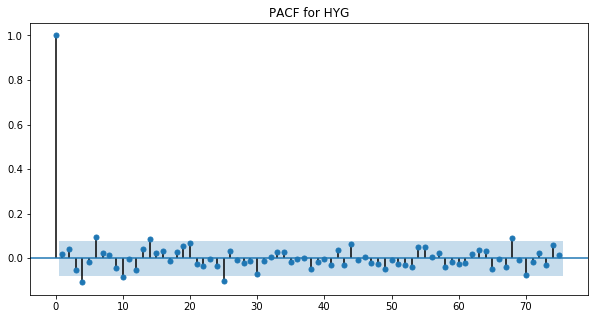

In [36]:
plt.rcParams["figure.figsize"] = (10,5)

for i in t:
    plot_acf(t[i],lags=75)
    plt.title('ACF for %s'%i)
    
for j in t:
    plot_pacf(t[j], lags=75)
    plt.title('PACF for %s'%j)

# Run Granger Causality Tests on Every Differenced Variable

In [37]:
grangers_causation_matrix(t, variables = t.columns)

,IV_x,Rates_x,HV_x,VIX_x,Curve_x,SPX_x,SPXHV_x,Spreads_x,HYG_x
IV_y,1.0000,0.0001,0.0284,0.0263,0.0328,0.0003,0.0000,0.0004,0.1506
Rates_y,0.0002,1.0000,0.0034,0.0000,0.1839,0.0510,0.2483,0.0031,0.0000
HV_y,0.0000,0.2304,1.0000,0.0000,0.0000,0.0085,0.0020,0.0082,0.0000
VIX_y,0.0240,0.0910,0.2167,1.0000,0.0007,0.0110,0.0085,0.0245,0.0048
Curve_y,0.0021,0.0814,0.0007,0.0000,1.0000,0.0152,0.0159,0.0240,0.0000
SPX_y,0.0025,0.0948,0.3851,0.0017,0.0675,1.0000,0.0000,0.5795,0.0301
SPXHV_y,0.0062,0.1744,0.0005,0.0320,0.4910,0.0000,1.0000,0.0002,0.0164
Spreads_y,0.0009,0.0013,0.0001,0.0006,0.0078,0.2249,0.0146,1.0000,0.0000
HYG_y,0.0001,0.0021,0.0002,0.0000,0.0000,0.0033,0.0000,0.0015,1.0000


In [38]:
from statsmodels.tsa.stattools import grangercausalitytests
print(grangercausalitytests(t[['IV','Rates']], maxlag=30, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.3056 , p=0.0002  , df_denom=623, df_num=1
ssr based chi2 test:   chi2=14.3745 , p=0.0001  , df=1
likelihood ratio test: chi2=14.2119 , p=0.0002  , df=1
parameter F test:         F=14.3056 , p=0.0002  , df_denom=623, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.3352  , p=0.0007  , df_denom=620, df_num=2
ssr based chi2 test:   chi2=14.7887 , p=0.0006  , df=2
likelihood ratio test: chi2=14.6164 , p=0.0007  , df=2
parameter F test:         F=7.3352  , p=0.0007  , df_denom=620, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3930  , p=0.0011  , df_denom=617, df_num=3
ssr based chi2 test:   chi2=16.3624 , p=0.0010  , df=3
likelihood ratio test: chi2=16.1516 , p=0.0011  , df=3
parameter F test:         F=5.3930  , p=0.0011  , df_denom=617, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2101  , p=0.0004  

# Run Cointegration Tests for Each of the Differenced Variables

In [39]:
cointegration_test(t)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
IV     ::  1295.33   > 179.5199  =>   True
Rates  ::  1021.46   > 143.6691  =>   True
HV     ::  807.48    > 111.7797  =>   True
VIX    ::  614.42    > 83.9383   =>   True
Curve  ::  459.09    > 60.0627   =>   True
SPX    ::  340.32    > 40.1749   =>   True
SPXHV  ::  237.79    > 24.2761   =>   True
Spreads ::  138.27    > 12.3212   =>   True
HYG    ::  58.23     > 4.1296    =>   True


# Run Dickey-Fuller Tests on the Differenced Data to Check for Stationarity

In [40]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in t.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.6997
 No. Lags Chosen       = 5
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rates" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.9274
 No. Lags Chosen       = 1
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

# Test for best Lags to Use

In [41]:
model = VAR(t)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  9.193897885393518
BIC :  9.8321431464143
FPE :  9837.1601677112
HQIC:  9.441880279923172 

Lag Order = 2
AIC :  9.068475673719119
BIC :  10.282644525086997
FPE :  8678.850205139479
HQIC:  9.540260217566917 

Lag Order = 3
AIC :  8.854388938094866
BIC :  10.645911202244058
FPE :  7008.869407103251
HQIC:  9.550563647417325 

Lag Order = 4
AIC :  8.730731477416048
BIC :  11.101042859047224
FPE :  6198.056286065013
HQIC:  9.651886839798578 

Lag Order = 5
AIC :  8.681053706348969
BIC :  11.631595825953504
FPE :  5904.609590092795
HQIC:  9.827782695017534 

Lag Order = 6
AIC :  8.616879541402168
BIC :  12.149099969030303
FPE :  5547.305666727523
HQIC:  9.989777629538573 

Lag Order = 7
AIC :  8.590764531117527
BIC :  12.706116820392598
FPE :  5417.591512780355
HQIC:  10.190429706279224 

Lag Order = 8
AIC :  8.586301982956645
BIC :  13.28624570533755
FPE :  5411.199825892205
HQIC:  10.413334761602 

Lag Order = 9
AIC :  8.5815987953906
BIC :  13.867599574684734
FPE :  5

C:\Users\pjant\Miniconda3\envs\data601\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,9.727,9.792,1.677e+04,9.753
1,9.043,9.697*,8463.,9.298*
2,8.884,10.13,7214.,9.367
3,8.638,10.47,5648.,9.351
4,8.524,10.94,5042.,9.465
5,8.467,11.47,4766.,9.636
6,8.396,11.99,4449.,9.795
7,8.371,12.55,4352.,9.999
8,8.339,13.11,4229.,10.20
9,8.324*,13.68,4185.*,10.41


# Fit the Model

In [43]:
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 18, May, 2020
Time:                     22:42:36
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    13.8676
Nobs:                     618.000    HQIC:                   10.6366
Log likelihood:          -9805.85    FPE:                    5408.70
AIC:                      8.58160    Det(Omega_mle):         1762.41
--------------------------------------------------------------------
Results for equation IV
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.183843         0.275909           -0.666           0.505
L1.IV             -0.046614         0.053925           -0.864           0.387
L1.Rates         -17.257745         3.325622           -5.189           0.0

# Run Durbin Watson Stats on Fitted Model

In [44]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(t.columns, out):
    print((col), ':', round(val, 2))

IV : 2.0
Rates : 2.0
HV : 2.01
VIX : 2.0
Curve : 1.99
SPX : 2.0
SPXHV : 2.03
Spreads : 1.98
HYG : 1.99


# Run the Forecasts

In [45]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = t.values[-lag_order:]
forecast_input

9


array([[-4.21140000e+00,  8.75000000e-02, -2.12594497e-02,
        -3.37000000e+00,  1.06000000e-02,  6.21200000e+01,
        -9.59631773e+00,  1.07000000e+00,  4.40000000e-01],
       [-1.21600000e+00, -8.20000000e-03, -3.80911083e-01,
        -1.79000000e+00, -1.17000000e-02,  2.81600000e+01,
        -1.27919357e+00, -1.07000000e+00,  4.30000000e-01],
       [ 5.64740000e+00, -1.34000000e-01, -1.25043567e-01,
         3.40000000e+00, -4.21000000e-02, -3.61900000e+01,
         3.31804499e+00, -1.88000000e+00, -7.00000000e-02],
       [ 1.73200000e+01, -2.80300000e-01,  2.32338290e-01,
         2.30300000e+01,  1.01500000e-01, -3.83530000e+02,
         2.12661559e+01,  4.13000000e+00, -2.29000000e+00],
       [ 1.12300000e+01, -2.76700000e-01,  9.08003170e-01,
         1.83000000e+00,  6.41000000e-02,  1.81500000e+01,
         2.47495091e+01,  1.10000000e+01, -9.90000000e-01],
       [ 2.69825000e+01,  1.22500000e-01,  7.10850849e-01,
         1.58900000e+01,  2.37700000e-01, -2.613500

# Test the Model

In [46]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = t.values[-lag_order:]
forecast_input

9


array([[-4.21140000e+00,  8.75000000e-02, -2.12594497e-02,
        -3.37000000e+00,  1.06000000e-02,  6.21200000e+01,
        -9.59631773e+00,  1.07000000e+00,  4.40000000e-01],
       [-1.21600000e+00, -8.20000000e-03, -3.80911083e-01,
        -1.79000000e+00, -1.17000000e-02,  2.81600000e+01,
        -1.27919357e+00, -1.07000000e+00,  4.30000000e-01],
       [ 5.64740000e+00, -1.34000000e-01, -1.25043567e-01,
         3.40000000e+00, -4.21000000e-02, -3.61900000e+01,
         3.31804499e+00, -1.88000000e+00, -7.00000000e-02],
       [ 1.73200000e+01, -2.80300000e-01,  2.32338290e-01,
         2.30300000e+01,  1.01500000e-01, -3.83530000e+02,
         2.12661559e+01,  4.13000000e+00, -2.29000000e+00],
       [ 1.12300000e+01, -2.76700000e-01,  9.08003170e-01,
         1.83000000e+00,  6.41000000e-02,  1.81500000e+01,
         2.47495091e+01,  1.10000000e+01, -9.90000000e-01],
       [ 2.69825000e+01,  1.22500000e-01,  7.10850849e-01,
         1.58900000e+01,  2.37700000e-01, -2.613500

In [47]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index[-nobs:], columns=t.columns + '_1d')
df_forecast

,IV_1d,Rates_1d,HV_1d,VIX_1d,Curve_1d,SPX_1d,SPXHV_1d,Spreads_1d,HYG_1d
Date,,,,,,,,,
2020-04-10,4.664225,0.109368,0.757348,-4.966255,0.108744,5.441999,10.074219,1.503843,1.790895
2020-04-17,-6.365622,-0.186104,0.174928,-4.796375,-0.040928,-32.474109,-8.292275,2.716519,3.287071
2020-04-24,-5.767113,-0.064059,-0.471840,-4.669198,-0.014931,70.560336,18.899135,-2.279111,2.579512
2020-05-01,-5.908304,-0.421023,0.143513,1.547651,-0.186449,27.368920,-8.043129,-6.257940,-2.559615
2020-05-08,-1.456069,0.056167,-0.846508,-2.743917,-0.114986,14.778662,-20.112303,1.715141,0.639065


In [48]:
forecast_input.shape, nobs, fc.shape

((9, 9), 5, (5, 9))

In [49]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
#        if second_diff:
#            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [50]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)       
df_results.loc[:, ['IV_forecast', 'Rates_forecast', 'HV_forecast', 'VIX_forecast', 'Curve_forecast',
                   'SPX_forecast', 'SPXHV_forecast', 'CDXHY_forecast','Spreads_forecast','HYG_forecast']]

C:\Users\pjant\Miniconda3\envs\data601\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,IV_forecast,Rates_forecast,HV_forecast,VIX_forecast,Curve_forecast,SPX_forecast,SPXHV_forecast,CDXHY_forecast,Spreads_forecast,HYG_forecast
Date,,,,,,,,,,
2020-04-10,76.274225,0.761568,0.978826,41.833745,0.291144,2494.091999,54.844877,NaN,6.873843,75.340895
2020-04-17,69.908604,0.575464,1.153753,37.037370,0.250215,2461.617890,46.552602,NaN,9.590361,78.627966
2020-04-24,64.141491,0.511405,0.681914,32.368172,0.235284,2532.178226,65.451736,NaN,7.311250,81.207478
2020-05-01,58.233187,0.090382,0.825427,33.915823,0.048835,2559.547146,57.408607,NaN,1.053310,78.647863
2020-05-08,56.777118,0.146549,-0.021082,31.171906,-0.066151,2574.325809,37.296304,NaN,2.768452,79.286927


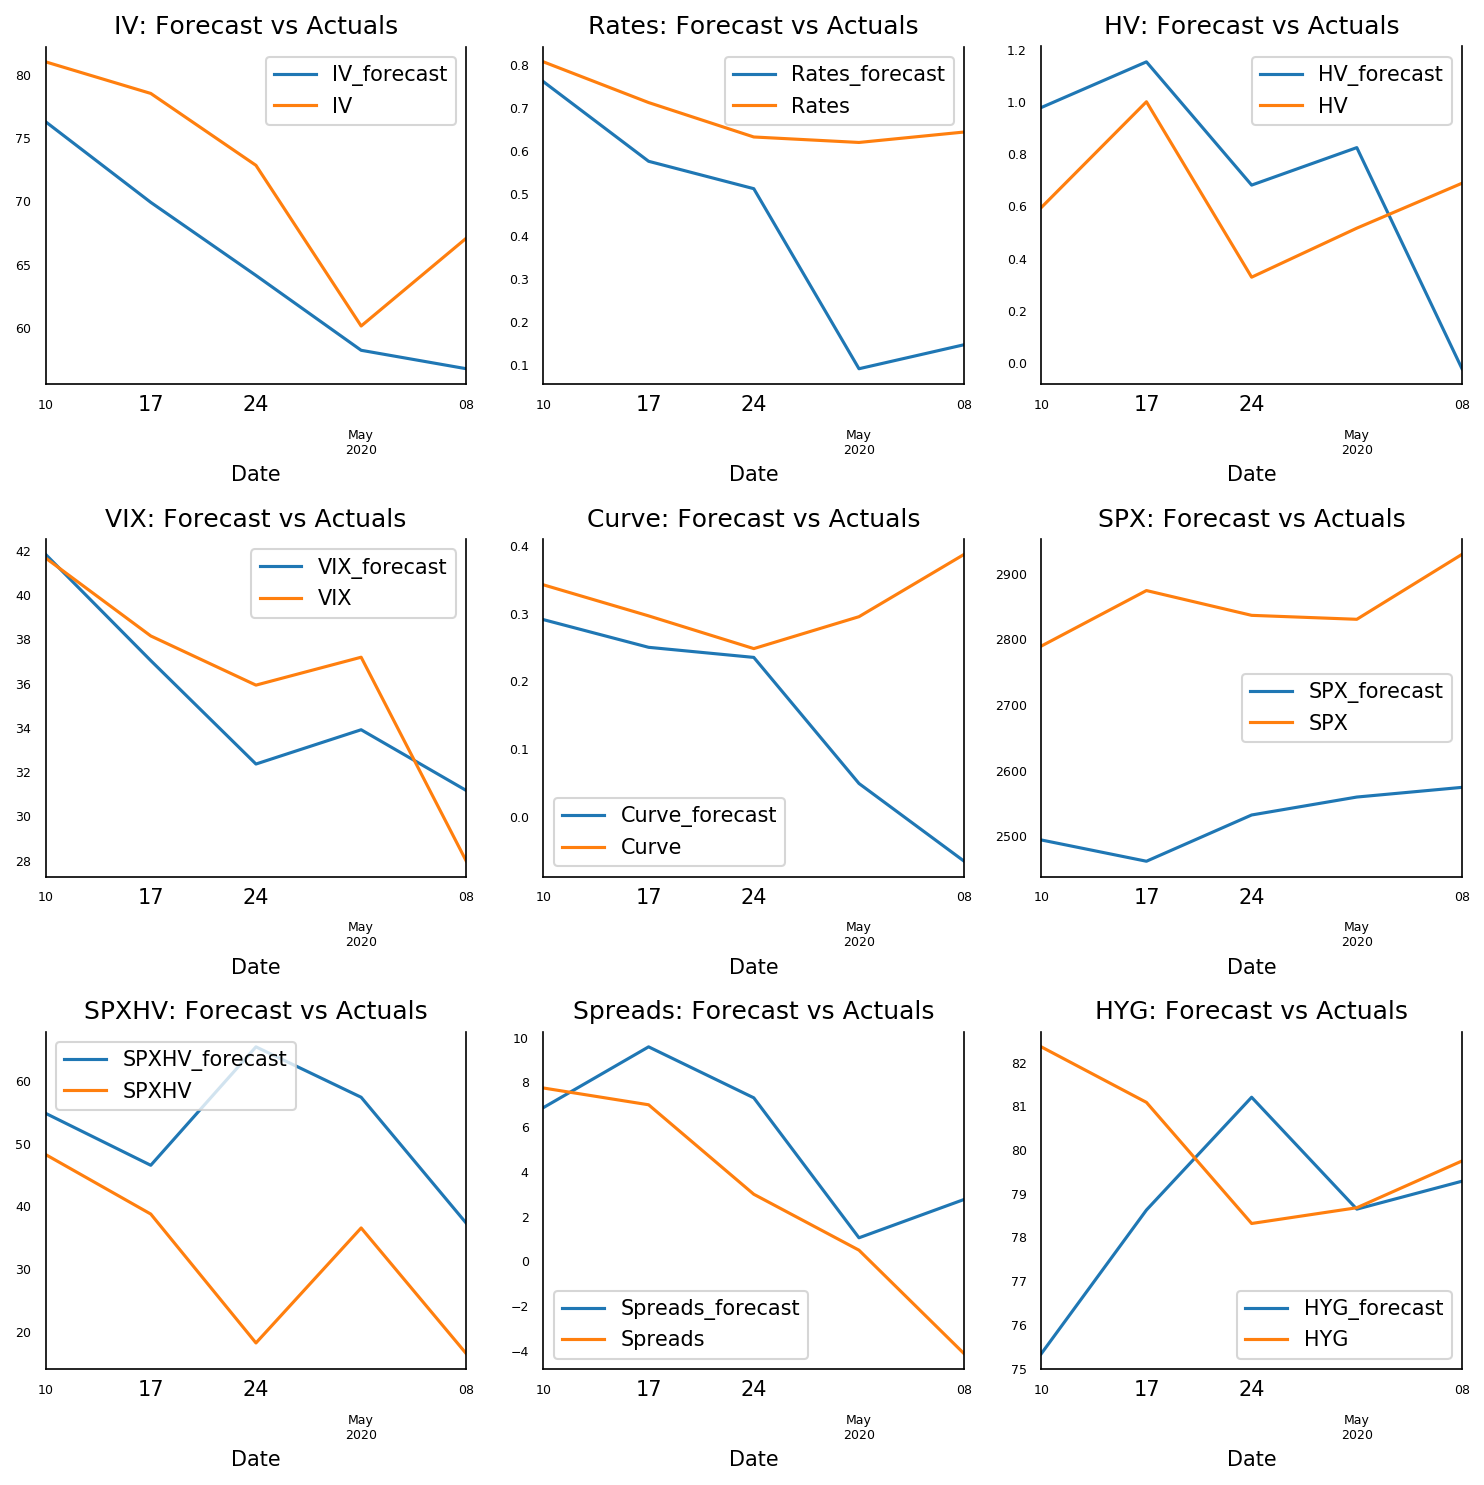

In [51]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/3), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Run the Model Accuracy Statistics

In [52]:
# mape is mean absolute percentage error (errors / values)
# me is margin of error (a statistic expressing the amount of random sampling error in the results of a survey)
# mae is mean absolute error
# mpe is mean percentage error
# rmse is root mean squared error
# corr is correlation between the forecast and the actual values

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: IV')
accuracy_prod = forecast_accuracy(df_results['IV_forecast'].values, df_test['IV'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Rates')
accuracy_prod = forecast_accuracy(df_results['Rates_forecast'].values, df_test['Rates'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: HV')
accuracy_prod = forecast_accuracy(df_results['HV_forecast'].values, df_test['HV'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: VIX')
accuracy_prod = forecast_accuracy(df_results['VIX_forecast'].values, df_test['VIX'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Curve')
accuracy_prod = forecast_accuracy(df_results['Curve_forecast'].values, df_test['Curve'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: SPX')
accuracy_prod = forecast_accuracy(df_results['SPX_forecast'].values, df_test['SPX'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: SPXHV')
accuracy_prod = forecast_accuracy(df_results['SPXHV_forecast'].values, df_test['SPXHV'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Spreads')
accuracy_prod = forecast_accuracy(df_results['Spreads_forecast'].values, df_test['Spreads'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))
    
print('\nForecast Accuracy of: HYG')
accuracy_prod = forecast_accuracy(df_results['HYG_forecast'].values, df_test['HYG'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: IV
mape :  0.0945
me :  -6.8474
mae :  6.8474
mpe :  -0.0945
rmse :  7.5057
corr :  0.9155
minmax :  0.0945

Forecast Accuracy of: Rates
mape :  0.4136
me :  -0.2662
mae :  0.2662
mpe :  -0.4136
rmse :  0.3355
corr :  0.8209
minmax :  0.4136

Forecast Accuracy of: HV
mape :  0.6984
me :  0.0973
mae :  0.3813
mpe :  0.2862
rmse :  0.4227
corr :  0.2412
minmax :  0.4889

Forecast Accuracy of: VIX
mape :  0.0669
me :  -0.9186
mae :  2.2609
mpe :  -0.0197
rmse :  2.6404
corr :  0.8371
minmax :  0.0645

Forecast Accuracy of: Curve
mape :  0.4729
me :  -0.1623
mae :  0.1623
mpe :  -0.4729
rmse :  0.2332
corr :  -0.5344
minmax :  0.4729

Forecast Accuracy of: SPX
mape :  0.1148
me :  -327.9738
mae :  327.9738
mpe :  -0.1148
rmse :  331.851
corr :  0.3555
minmax :  0.1148

Forecast Accuracy of: SPXHV
mape :  0.9535
me :  20.6574
mae :  20.6574
mpe :  0.9535
rmse :  25.318
corr :  0.1298
minmax :  0.3861

Forecast Accuracy of: Spreads
mape :  0.9394
me :  2.6954
mae :  3.0

# Next n Weeks Predictions

In [53]:
df_w = df[df.index.dayofweek==4]

In [54]:
df_w.index[-1]

Timestamp('2020-05-08 00:00:00')

In [55]:
bd = pd.tseries.offsets.Week(n = nobs)
bd

<5 * Weeks: weekday=None>

In [56]:
df_w.index[-1] + bd

Timestamp('2020-06-12 00:00:00')

In [57]:
ed = bd + df_w.index[-1]
fc_dates = pd.bdate_range(pd.tseries.offsets.Week(1) + df_w.index[-1], ed, freq='7D')
fc_dates = fc_dates[0:nobs]
fc_dates

DatetimeIndex(['2020-05-15', '2020-05-22', '2020-05-29', '2020-06-05',
               '2020-06-12'],
              dtype='datetime64[ns]', freq='7D')

In [58]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=fc_dates, columns=df.columns + '_1d')
df_forecast

,IV_1d,Rates_1d,HV_1d,VIX_1d,Curve_1d,SPX_1d,SPXHV_1d,Spreads_1d,HYG_1d
2020-05-15,4.664225,0.109368,0.757348,-4.966255,0.108744,5.441999,10.074219,1.503843,1.790895
2020-05-22,-6.365622,-0.186104,0.174928,-4.796375,-0.040928,-32.474109,-8.292275,2.716519,3.287071
2020-05-29,-5.767113,-0.064059,-0.471840,-4.669198,-0.014931,70.560336,18.899135,-2.279111,2.579512
2020-06-05,-5.908304,-0.421023,0.143513,1.547651,-0.186449,27.368920,-8.043129,-6.257940,-2.559615
2020-06-12,-1.456069,0.056167,-0.846508,-2.743917,-0.114986,14.778662,-20.112303,1.715141,0.639065


In [59]:
fc

array([[ 4.66422520e+00,  1.09367953e-01,  7.57348094e-01,
        -4.96625498e+00,  1.08743524e-01,  5.44199885e+00,
         1.00742189e+01,  1.50384258e+00,  1.79089494e+00],
       [-6.36562164e+00, -1.86104212e-01,  1.74927829e-01,
        -4.79637461e+00, -4.09282422e-02, -3.24741089e+01,
        -8.29227502e+00,  2.71651856e+00,  3.28707106e+00],
       [-5.76711273e+00, -6.40586639e-02, -4.71839585e-01,
        -4.66919817e+00, -1.49314183e-02,  7.05603362e+01,
         1.88991346e+01, -2.27911098e+00,  2.57951174e+00],
       [-5.90830431e+00, -4.21022865e-01,  1.43513055e-01,
         1.54765094e+00, -1.86449054e-01,  2.73689200e+01,
        -8.04312911e+00, -6.25793991e+00, -2.55961483e+00],
       [-1.45606891e+00,  5.61671291e-02, -8.46508383e-01,
        -2.74391688e+00, -1.14985633e-01,  1.47786625e+01,
        -2.01123035e+01,  1.71514126e+00,  6.39064556e-01]])

In [60]:
df_results = invert_transformation(df_w, df_forecast, second_diff=False)       
df_results = df_results.loc[:, ['IV_forecast', 'Rates_forecast', 'HV_forecast', 'VIX_forecast', 'Curve_forecast',
                   'SPX_forecast', 'SPXHV_forecast','Spreads_forecast','HYG_forecast']]

df_w_lastrow = df_w.iloc[[-1]]
df_w_lastrow.columns = df_results.columns

df_results = pd.concat([df_w_lastrow, df_results])
df_results

,IV_forecast,Rates_forecast,HV_forecast,VIX_forecast,Curve_forecast,SPX_forecast,SPXHV_forecast,Spreads_forecast,HYG_forecast
2020-05-08,67.085400,0.643900,0.689029,27.980000,0.387700,2929.800000,16.478790,-4.130000,79.750000
2020-05-15,71.749625,0.753268,1.446377,23.013745,0.496444,2935.241999,26.553009,-2.626157,81.540895
2020-05-22,65.384004,0.567164,1.621305,18.217370,0.455515,2902.767890,18.260734,0.090361,84.827966
2020-05-29,59.616891,0.503105,1.149465,13.548172,0.440584,2973.328226,37.159869,-2.188750,87.407478
2020-06-05,53.708587,0.082082,1.292978,15.095823,0.254135,3000.697146,29.116740,-8.446690,84.847863
2020-06-12,52.252518,0.138249,0.446470,12.351906,0.139149,3015.475809,9.004436,-6.731548,85.486927


In [61]:
from datetime import datetime

directory = (r'c:/Users/pjant/Trading/Market Price Prediction Results/')

#csv_file = 'weekly predictions from ' + str(datetime.now().strftime('%Y%m%d'))+'.csv'
csv_file = 'weekly predictions from 20200508.csv'
df_results.to_csv(directory + csv_file)

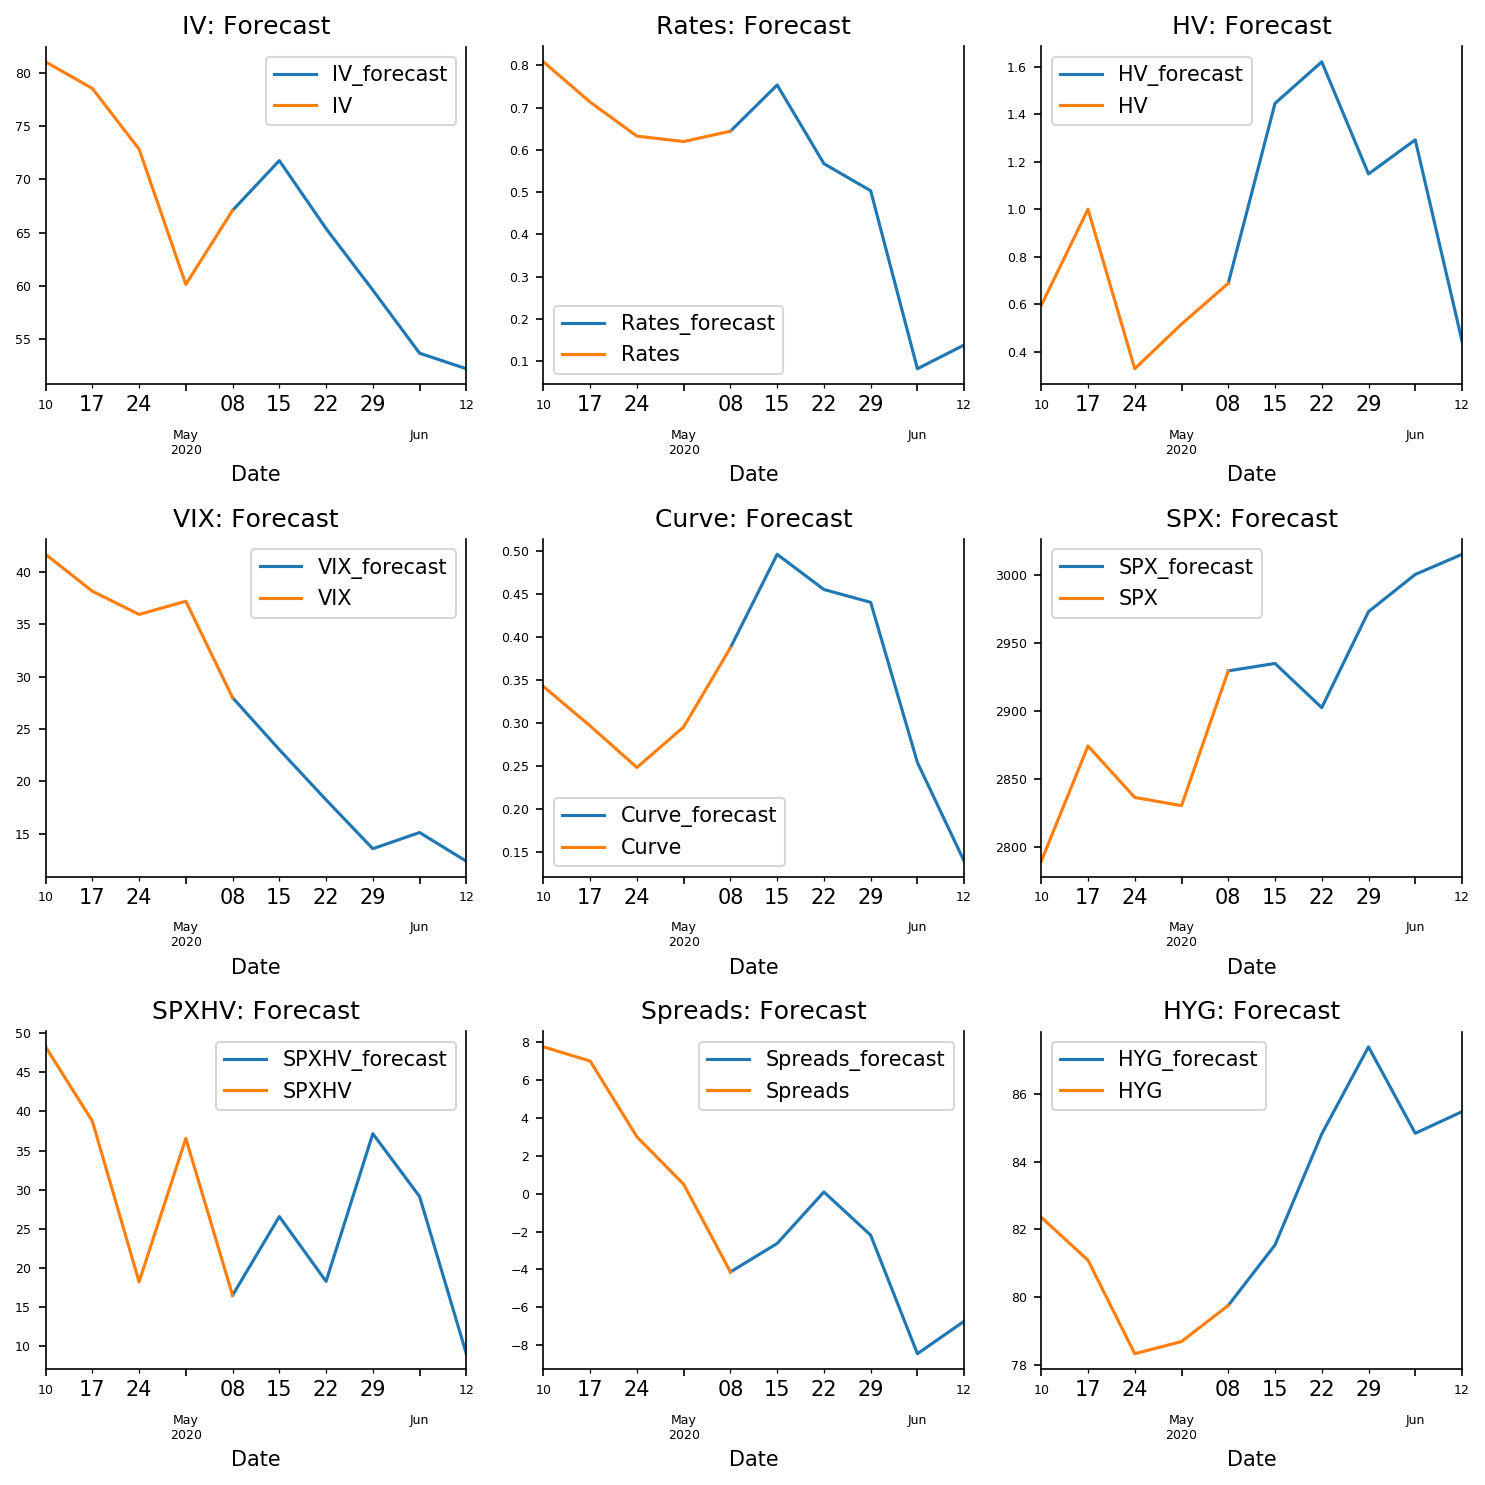

In [62]:
fig, axes = plt.subplots(nrows=int(len(df_w.columns)/3), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_w.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_w[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast")
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();